In [39]:
from ast import increment_lineno
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [40]:
data = pd.read_csv('/content/Bengaluru_House_Data.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [41]:
data.shape

(13320, 9)

In [42]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [43]:
df2 = data.drop(['area_type','society','balcony','availability'],axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Beginning Data Cleaning

In [44]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since the no. of NA values of bathroom is very small compared to the dataset, we can drop them.

In [45]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [46]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [47]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-47-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [48]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [49]:
df3[df3.bhk>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [50]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here we see a range of values for the size of a house. We need to find the average size.

In [51]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [52]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [53]:
def convert_sft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [54]:
df4 = df3.copy()
df4['total_sft'] = df4['total_sqft']
df4 = df4.drop(['total_sqft'],axis = 1)

In [55]:
df4['total_sft'] = df4['total_sft'].apply(convert_sft_to_num)

In [56]:
df4.loc[30]

location     Yelahanka
size             4 BHK
bath               4.0
price            186.0
bhk                  4
total_sft       2475.0
Name: 30, dtype: object

At the end of this, the data looks much better than when we loaded it.
We have tackled range of values in sft, tackled bedroom numbers, and dropped null values. Note that if the number of null values had been significant, we would have imputed the values.

Now, we shall begin feature engineering

We added price_per_sft

In [57]:
df5 = df4.copy()
df5['price_per_sft'] = df5['price']*100000/df5['total_sft']
df5.head()

,location,size,bath,price,bhk,total_sft,price_per_sft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [58]:
len(df5.location.unique())
#Too many locations => called Dimensionality Curse

1304

In [59]:
df5.location = df5.location.apply(lambda x:x.strip()) #removing spaces at the end
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [60]:
len(location_stats[location_stats<=10])

1052

In [61]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [62]:
len(df5.location.unique())

1293

In [63]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [64]:
df5.head(10)

,location,size,bath,price,bhk,total_sft,price_per_sft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2 BHK,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4 BHK,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4 BHK,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3 BHK,3.0,63.25,3,1310.0,4828.244275
9,other,6 Bedroom,6.0,370.00,6,1020.0,36274.509804


Outlier Removal. Outliers are basically like the errors in data, or extreme variations in the data.

In [65]:
df5.shape

(13246, 7)

In [66]:
df6 = df5[~(df5.total_sft/df5.bhk<300)]
df6.shape

(12502, 7)

In [67]:
df6.price_per_sft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sft, dtype: float64

In [68]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sft)
    st = np.std(subdf.price_per_sft)
    reduced_df = subdf[(subdf.price_per_sft>(m-st))&(subdf.price_per_sft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index = True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [69]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location == location)&(df.bhk == 2)]
  bhk3 = df[(df.location == location)&(df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (10,8)
  plt.scatter(bhk2.total_sft, bhk2.price_per_sft,color = 'blue', label = '2BHK', s =50)
  plt.scatter(bhk3.total_sft, bhk3.price_per_sft,color = 'red', label = '3BHK', s =50, marker = '+')
  plt.xlabel('Total Surface Area')
  plt.ylabel('Price per sft')
  plt.legend()

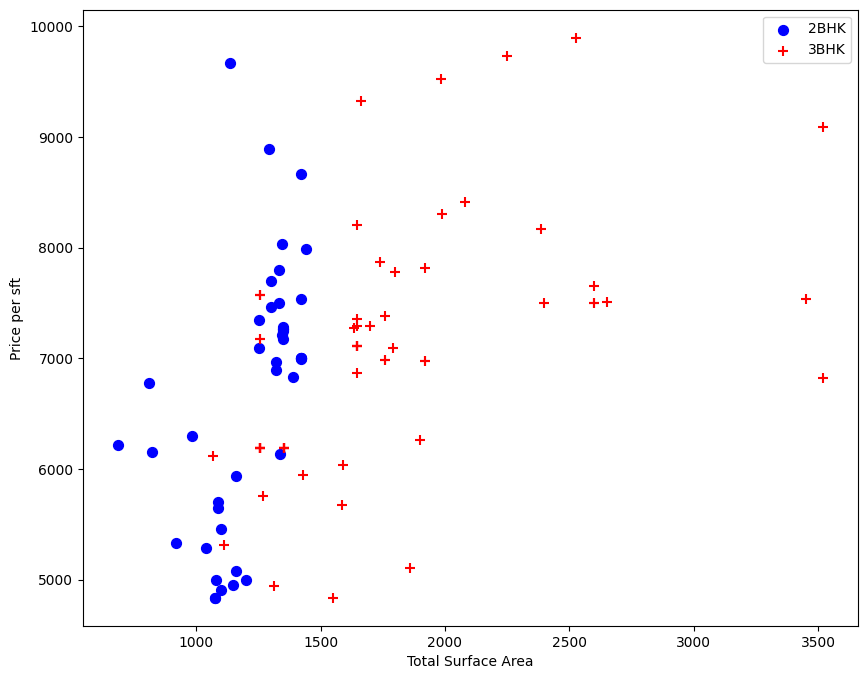

In [70]:
plot_scatter_chart(df7,'Hebbal')

In [80]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sft),
                'std': np.std(bhk_df.price_per_sft),
                'count': bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

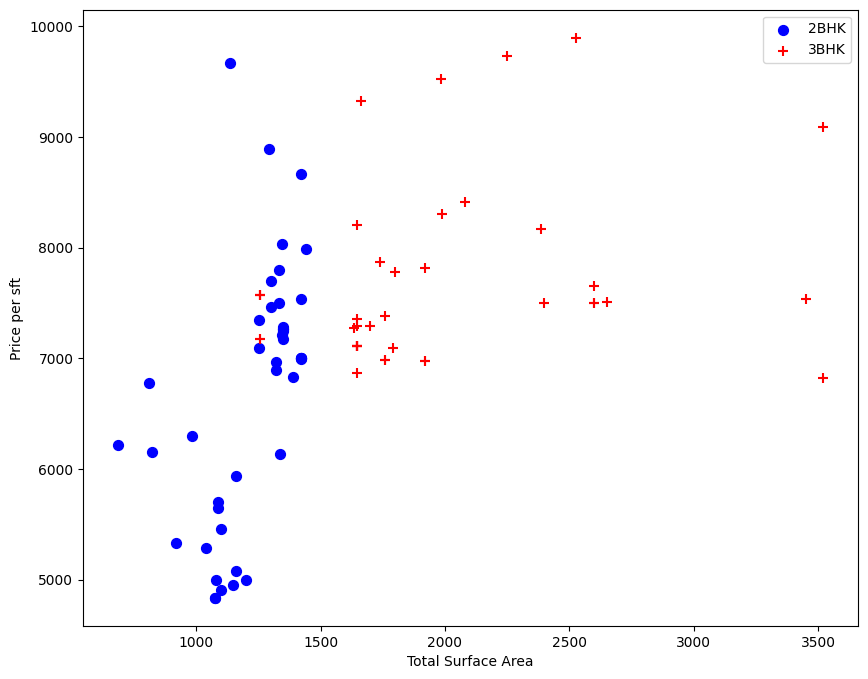

In [78]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

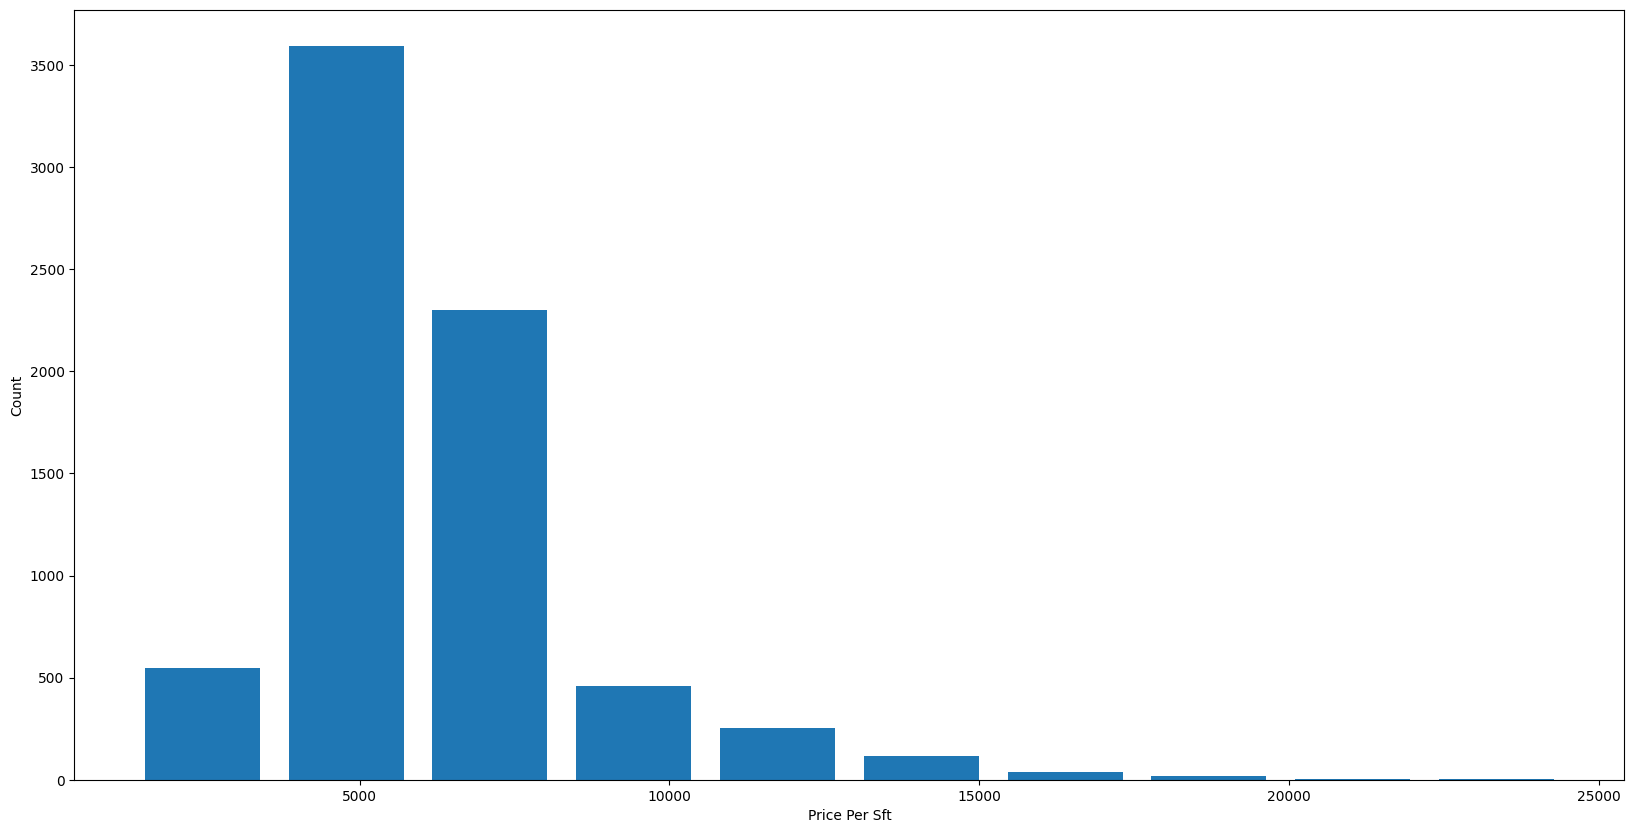

In [81]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sft, rwidth = 0.8)
plt.xlabel("Price Per Sft")
plt.ylabel("Count")

In [82]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [83]:
df8[df8.bath>10]

,location,size,bath,price,bhk,total_sft,price_per_sft
5277,Neeladri Nagar,10 BHK,12.0,160.0,10,4000.0,4000.000000
8486,other,10 BHK,12.0,525.0,10,12000.0,4375.000000
8575,other,16 BHK,16.0,550.0,16,10000.0,5500.000000
9308,other,11 BHK,12.0,150.0,11,6000.0,2500.000000
9639,other,13 BHK,13.0,275.0,13,5425.0,5069.124424


In [84]:
df8[df8.bath>df8.bhk+2]

,location,size,bath,price,bhk,total_sft,price_per_sft
1626,Chikkabanavar,4 Bedroom,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,4 Bedroom,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,3 BHK,6.0,116.0,3,1806.0,6423.034330
8411,other,6 BHK,9.0,1000.0,6,11338.0,8819.897689


In [85]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

For training, we need to drop unnecessary columns

Lets drop size and price_per_sft

In [86]:
df10 = df9.drop(['size','price_per_sft'],axis = 1)
df10.head(3)

,location,bath,price,bhk,total_sft
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0


Training a Machine Learning Model

In [90]:
dummies = pd.get_dummies(df10.location)

In [95]:
df11 = pd.concat([df10,dummies.drop('other',axis = 1)],axis = 1)
df12 = df11.drop(['location'],axis = 1)
df12.head()

,bath,price,bhk,total_sft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df12.shape

(7251, 245)

In [98]:
X = df12.drop(['price'],axis = 1)
X.head(3)

,bath,bhk,total_sft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [104]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8279646893753806

In [105]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [110]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
  algos = {"linear_regression":{
        'model':LinearRegression(),
          'params' : {
              # 'normalize': [True, False]
          }
        },
        "Lasso":{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        "decision_tree":{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score = False)
    gs.fit(X,y)
    scores.append({
        'model':algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_})
  
  return pd.DataFrame(scores, columns = ['model','best_score','best_params'])

In [111]:
find_best_model(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,Lasso,0.687439,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.721017,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [116]:
def predict_price(location, sft, bath, bhk):
  loc_index = np.where(X.columns ==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sft
  x[1] = bath
  x[2] = bhk
  if loc_index >=0:
    x[loc_index] = 1
  
  return lr_clf.predict([x])[0]

In [117]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.36080224642046

In [118]:
predict_price('1st Phase JP Nagar',1000,3,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.06531769995324

In [119]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


171.7675103258375

In [123]:
predict_price('Indira Nagar',1000,3,3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


167.47202577937023

In [126]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [128]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
  f.write(json.dumps(columns))

***Building Our Python Flask Server***